# FAKE NEWS DETECTION

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Reading csv file
data = pd.read_csv("data.csv")
data

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [3]:
#Basic Checks
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
data.tail()

,URLs,Headline,Body,Label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


In [5]:
#summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [6]:
#stastical information of data
data.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
#missing values 
data.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [8]:
#getting unique values in Body column
data.Body.unique()

array(['Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously missed their shift this morning. — Sen

In [9]:
#getting unique value count
data.Body.value_counts()

A Potato Battery Can Light up a Room for Over a Month DIY (System That Can Be Used to Provide Rooms With LED-Powered Lighting for as Long as 40 days) +Video                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# EDA

<AxesSubplot:>

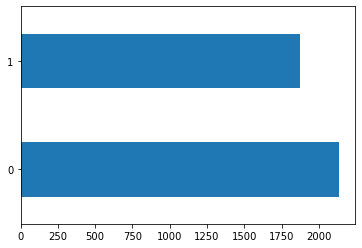

In [10]:
data['Label'].value_counts().plot(kind="barh")

#### Insights
- From above lot we got to know that there is more fake news than true..

In [12]:
X = data['Body']
y = data['Label']


In [13]:
print(X)
print(y)

0       Image copyright Getty Images\nOn Sunday mornin...
1       LONDON (Reuters) - “Last Flag Flying”, a comed...
2       The feud broke into public view last week when...
3       MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4       Country singer Jason Aldean, who was performin...
                              ...                        
4004    Trends to Watch\n% of readers think this story...
4005    Trump Jr. Is Soon To Give A 30-Minute Speech F...
4006                                                  NaN
4007    SHANGHAI (Reuters) - China said it plans to ac...
4008    Vice President Mike Pence Leaves NFL Game Beca...
Name: Body, Length: 4009, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64


In [14]:
#Finding missing values
data.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

- Here we can say that Body column have 21 missing values.

In [15]:
#handling missing values
data['Body'] = data['Body'].fillna('')

In [16]:
data.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

In [17]:
#Now we will drop urls, headline and body column
data['News'] = data['Headline']+data['Body']
dataa =['URLs','Headline','Body']
data1 = data.drop(dataa, axis=1)

In [18]:
data1.head()

,Label,News
0,1,Four ways Bob Corker skewered Donald TrumpImag...
1,1,Linklater's war veteran comedy speaks to moder...
2,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,1,Jason Aldean opens 'SNL' with Vegas tributeCou...


## Model Creation

In [19]:
#Applying TF and IDF algorithm to get structured data from unstructured data
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
#Splitting data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [22]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [23]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)


PassiveAggressiveClassifier(max_iter=50)

In [24]:
y_test_pred = classifier.predict(tfid_x_test)
y_train_pred = classifier.predict(tfid_x_train)

### Model Evaluation

In [25]:
scoree = accuracy_score(y_train,y_train_pred)
score = accuracy_score(y_test,y_test_pred)


In [26]:
print("Train prediction accurate value:",scoree)
print("Test prediction accurate value:",score)

Train prediction accurate value: 0.9956345494231369
Test prediction accurate value: 0.9825436408977556


## CONCLUSION

#### By above performance of model we conclude that using TF/IDF algorithm model gives the best result.